# **Linear Regression Model to predict the co2 emissions of a vehicle.**

## Downloading required libraries

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pandas

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [3]:
df = pd.read_csv("Fuel.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Preprocessing Data

We can see that there are some fields having categorical data which can be useful in predicting the CO2 Emissions.

In [4]:
df["VEHICLECLASS"].value_counts()

VEHICLECLASS
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

In [5]:
df["TRANSMISSION"].value_counts()

TRANSMISSION
A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: count, dtype: int64

In [6]:
df["FUELTYPE"].value_counts()

FUELTYPE
X    514
Z    434
E     92
D     27
Name: count, dtype: int64

Let's convert these categorical values to numerical data so that our linear regression model can utilise the data.

In [7]:
columnsToConvert = ["MAKE","MODEL","VEHICLECLASS","TRANSMISSION","FUELTYPE"]
df[columnsToConvert] = df[columnsToConvert].apply(lambda x: pd.factorize(x)[0])
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,2014,0,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,2014,0,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,2014,0,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,2014,0,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [8]:
df["FUELTYPE"].value_counts()

FUELTYPE
2    514
0    434
3     92
1     27
Name: count, dtype: int64

In [9]:
df["MODELYEAR"].value_counts()

MODELYEAR
2014    1067
Name: count, dtype: int64

We can see that all the cars in our dataset are having the same Model Year i.e, 2014. This field won't play any role in improving our model, so let's remove this field

In [10]:
df = df.drop("MODELYEAR", axis = 1)
df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,0,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,0,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,0,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,0,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [11]:
df.describe()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,17.223055,327.803187,4.280225,3.346298,5.794752,6.711340,1.247423,13.296532,9.474602,11.580881,26.441425,256.228679
std,10.937264,189.937056,3.790381,1.415895,1.797447,4.936472,1.083165,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,7.000000,165.500000,1.000000,2.000000,4.000000,3.000000,0.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,15.000000,307.000000,3.000000,3.400000,6.000000,4.000000,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,26.000000,499.500000,7.000000,4.300000,8.000000,11.000000,2.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,38.000000,662.000000,15.000000,8.400000,12.000000,21.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### **Feature Normalization**

As we can see from the above data, all the fields are having different ranges. Generally, normalizing the fields improves the efficiency of the Gradient Descent algorithm.   
Here, we will be doing mean normalization.

In [12]:
def inputs_normalize(x):
    x = np.array(x)
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)

    x = (x - mean)/std
    return x

df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,0,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,0,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,0,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,0,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [13]:
normalization_input_fields =['MAKE', 'MODEL', 'VEHICLECLASS' , 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE' , 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

normalized_inputs = inputs_normalize(df[normalization_input_fields])
normalized_inputs

array([[-1.57545174, -1.72666099, -1.12976284, ..., -0.99334135,
        -0.88430407,  0.87855306],
       [-1.57545174, -1.72666099, -1.12976284, ..., -0.63532912,
        -0.5685715 ,  0.34273362],
       [-1.57545174, -1.72139362, -1.12976284, ..., -1.31555236,
        -1.63058106,  2.88787597],
       ...,
       [ 1.90053816,  1.75507122, -0.86581343, ...,  0.11649658,
         0.06289365, -0.32704069],
       [ 1.90053816,  1.75507122, -0.86581343, ..., -0.06250954,
        -0.08062116, -0.19308583],
       [ 1.90053816,  1.7603386 ,  0.98183243, ...,  0.25970147,
         0.34992326, -0.59495041]])

In [14]:
df[normalization_input_fields] = normalized_inputs

In [15]:
df.describe()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1.067000e+03,1.067000e+03,1.067000e+03,1.067000e+03,1.067000e+03,1.067000e+03,1067.000000,1.067000e+03,1.067000e+03,1.067000e+03,1.067000e+03,1067.000000
mean,-1.065481e-16,5.327406e-17,1.265259e-16,2.663703e-17,-9.322960e-17,-5.327406e-17,0.000000,-5.327406e-17,-2.264147e-16,3.995554e-17,-1.598222e-16,256.228679
std,1.000469e+00,1.000469e+00,1.000469e+00,1.000469e+00,1.000469e+00,1.000469e+00,1.000469,1.000469e+00,1.000469e+00,1.000469e+00,1.000469e+00,63.372304
min,-1.575452e+00,-1.726661e+00,-1.129763e+00,-1.657890e+00,-1.555574e+00,-1.360179e+00,-1.152186,-2.121452e+00,-1.637763e+00,-1.975017e+00,-2.068454e+00,108.000000
25%,-9.351378e-01,-8.549111e-01,-8.658134e-01,-9.512918e-01,-9.989685e-01,-7.521729e-01,-1.152186,-7.431779e-01,-7.069316e-01,-7.407893e-01,-7.289053e-01,207.000000
50%,-2.033505e-01,-1.095781e-01,-3.379146e-01,3.794572e-02,1.142424e-01,-5.495041e-01,0.695121,-1.699137e-01,-2.415157e-01,-1.954330e-01,-5.913096e-02,251.000000
75%,8.028571e-01,9.043908e-01,7.178830e-01,6.738841e-01,1.227453e+00,8.691776e-01,0.695121,5.497160e-01,4.924094e-01,5.077895e-01,6.106433e-01,294.000000
max,1.900538e+00,1.760339e+00,2.829478e+00,3.570937e+00,3.453875e+00,2.895866e+00,1.618774,4.123470e+00,3.947227e+00,4.081308e+00,4.495334e+00,488.000000


### **Splitting the dataset into train and test data**

We will be using 80% of the dataset to train our linear regression model and then test it on the remaining 20% of the dataset to find the accuracy of the model

In [16]:
train_split = 0.8
df = df.sample(frac = 1)
split_index = int( len(df) * train_split)
df_train = df[:split_index]
df_test = df[split_index:]
df_train.describe()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,0.013698,0.014177,0.012058,0.000752,-0.001907,-0.000659,0.014021,0.004850,0.012241,0.007540,-0.006052,256.439625
std,0.996761,0.994299,1.004821,0.994639,0.990277,1.008200,1.002255,1.006556,1.007491,1.006707,0.998786,63.994591
min,-1.575452,-1.726661,-1.129763,-1.657890,-1.555574,-1.360179,-1.152186,-2.121452,-1.637763,-1.975017,-2.068454,108.000000
25%,-0.935138,-0.831208,-0.865813,-0.951292,-0.998969,-0.752173,-1.152186,-0.730981,-0.706932,-0.740789,-0.728905,207.000000
50%,-0.203350,-0.093776,-0.337915,0.037946,0.114242,-0.549504,0.695121,-0.169914,-0.241516,-0.195433,-0.059131,251.000000
75%,0.802857,0.907024,0.717883,0.673884,1.227453,0.869178,0.695121,0.513125,0.510310,0.493438,0.610643,294.000000
max,1.900538,1.760339,2.829478,3.570937,3.453875,2.895866,1.618774,4.123470,3.947227,4.081308,4.495334,488.000000


In [17]:
input_fields =  ['MAKE', 'MODEL', 'VEHICLECLASS' , 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE' , 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
x_train = df_train[input_fields]
y_train = df_train["CO2EMISSIONS"]
x_test = df_test[input_fields]
y_test = df_test["CO2EMISSIONS"]

## Linear Regression Model

The value predicted by linear regression is given by:  
  
$\widehat{y} = X\Theta = \Theta _{0} + X_{1}\Theta _{1} + .... + X_{n}\Theta _{n}$  , where X is the matrix of input features and $\Theta$ is the matrix of parametres.

The objective of linear regression is to minimize the cost function which is given by: 
 
$J(\Theta) = \frac{1}{2m} \sum_{i = 1}^{n} (\widehat{y}_{i} - y_{i} )^2$



### **Cost Function**

In [18]:
def cost(x , y, theta):
    y_hat = x.dot(theta)
    m = len(x)
    J = (1/(m)) * ( (y_hat-y).T.dot(y_hat-y))
    return J

### **Gradient Descent**

Gradient Descent is an algorithm used to minimize the cost function $J(\Theta)$ by updating the values of $\Theta$ in every iteration. It works best in case of convex functions only. Initially, we assign a random value to the parameters $\Theta$.
The algorithm then updates the parameters:  

$\Theta _{i} = \Theta _{i} - \alpha \frac{\partial J(\Theta )}{\partial \Theta _{i}} $   , where $\alpha$ is known as the learning rate

which simplifies to:

$\Theta _{i} = \Theta _{i} - \alpha \frac{1}{m} \sum_{i = 1}^{n} (\widehat{y_{i}} - y_{i}).x_{i}$


In [19]:
def gradient_descent( x , y , theta, alpha, num_cycles ):
    m = len(x)
    J_values = np.ones( shape = (num_cycles, 1) )

    for i in range(0 , num_cycles):
        y_hat = x.dot(theta)
        dJ = (1/m) * ( (y_hat-y).T.dot(x))
        theta = theta - ( alpha * (dJ.T) )
        J_values[i] = cost(x,y,theta) 
    return theta, J_values

### **Finding the best learning rate $(\alpha)$**

As we have seen the predicted value (hypothesis) for linear regression is given by:  
$\widehat{y} = X\Theta = \Theta _{0} + X_{1}\Theta _{1} + .... + X_{n}\Theta _{n}$

We will have to introduce one more column to our dataset to account for the $\Theta_{0}$ 

In [20]:
x_train = np.hstack( (np.ones ( ( len(x_train) ,1 )  ), x_train) )
x_test  = np.hstack( (np.ones ( ( len(x_test ) ,1 )  ), x_test ) )

y_train = np.array(y_train.values).reshape(-1,1)
y_test  = np.array(y_test .values).reshape(-1,1)

We will plot graphs for the variation of cost function $J(\Theta)$ with the learning rate $(\alpha)$ to get the best learning rate. A very small learning rate, will require too many cycles of gradient descent, whereas a very large learning rate will overshoot the global minimum value, as the steps taken by the algorithm will be large. Hence we need to find a suitable learning rate.

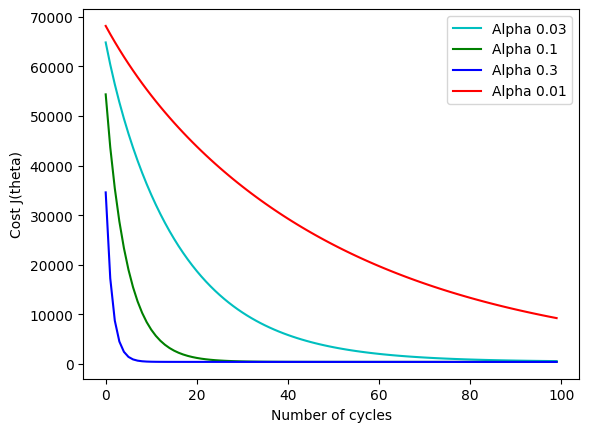

In [21]:
alpha = [ 0.03 , 0.1, 0.3, 0.01]
colors = [ 'c', 'g' , 'b' , 'r']
num_cycles = 100

for i in range(0,len(alpha)):
    theta = np.zeros(shape = (x_train.shape[1] , 1) )
    theta, J_values = gradient_descent( x_train, y_train, theta, alpha[i], num_cycles)
    plt.plot( range( len(J_values) ), J_values, colors[i], label='Alpha {}'.format( alpha[i] ) )
plt.xlabel('Number of cycles')
plt.ylabel('Cost J(theta)')
plt.legend()
plt.show()

Studying the above learning rate plot, we can find that the blue curve, i.e., $\alpha = 0.3$ is the best learning rate. So, we will train our final model based on a learning rate of $\alpha = 0.3$.

In [22]:
num_cycles = 1000
alpha = 0.3
theta = np.zeros(shape = (x_train.shape[1] , 1) )
theta, J_values = gradient_descent(x_train, y_train, theta, alpha, num_cycles)

### **Root Mean Squared Error(RMSE)**

Now, since we have written our linear regression model successfully, we will check the accuracy of the model using RMSE metric.   
RMSE stands for Root Mean Squared Error and is calculated as:  
RMSE = $\sqrt{\frac{1}{n} \sum_{i = 1}^{n} (\widehat{y}_{i} - y_{i} )^2}$

In [23]:
import math
squared_error = []
for i in range( 0 , len(x_test)):
    y_pred = x_test[i].dot(theta)[0]
    squared_error.append( (y_test[i][0] - y_pred)**2 )
mse = (1/len(squared_error)) * sum(squared_error)
rmse_org = math.sqrt(mse)

print("RMSE for the Linear Regression Model is:" ,rmse_org)
    

RMSE for the Linear Regression Model is: 17.457855411354785


## Importing Sci-kit learn

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()    
lin_reg.fit( x_train, y_train)

LinearRegression()

## Using sklearn's linear regression model to compare the accuracy with our model

In [25]:

for i in range( 0 , len(x_test)):
    y_pred = lin_reg.predict(x_test[i].reshape(1,-1))
    squared_error.append( (y_test[i][0] - y_pred) **2 )
mse = (1/len(squared_error)) * sum(squared_error)
rmse_sk = math.sqrt(mse)

print("RMSE for the Linear Regression Model implemented with sklearn is:", rmse_sk)

RMSE for the Linear Regression Model implemented with sklearn is: 17.459874775728355


C:\Users\avast\AppData\Local\Temp\ipykernel_45820\645886660.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rmse_sk = math.sqrt(mse)


In [26]:
from IPython.core.display import Markdown, display

row_1 = " | Original LR | " + str(rmse_org) + " | "
row_2 = " | sklearn LR | " + str(rmse_sk) + " | "
row_3 = " | Difference | " + str( rmse_sk - rmse_org) + " | "


display(Markdown('''# Conclusion
The table below shows the final calculated RMSE by our LR model and the sklearn LR model:

| Algorithm | RMSE |
|:---|----:|''' + "\n" + row_1 + "\n" + row_2 + "\n" + row_3

# | Sklearn LR  |  2  |
) )

C:\Users\avast\AppData\Local\Temp\ipykernel_45820\141112675.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Markdown, display


# Conclusion
The table below shows the final calculated RMSE by our LR model and the sklearn LR model:

| Algorithm | RMSE |
|:---|----:|
 | Original LR | 17.457855411354785 | 
 | sklearn LR | 17.459874775728355 | 
 | Difference | 0.0020193643735701983 | 